<a href="https://colab.research.google.com/github/Gee117/Bda-da2/blob/main/bdaDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()  # Select your kaggle.json file from your computer


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"geethikapurus","key":"f7dcd204d45bafcd0793a31e66049fc8"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set correct file permissions


In [5]:
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 79% 52.0M/66.0M [00:01<00:00, 57.2MB/s]
100% 66.0M/66.0M [00:01<00:00, 41.0MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [8]:
import pandas as pd
data = pd.read_csv('creditcard.csv')


In [3]:
!pip install kaggle
!pip install minisom
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
X = data.drop('Class', axis=1)
y = data['Class']

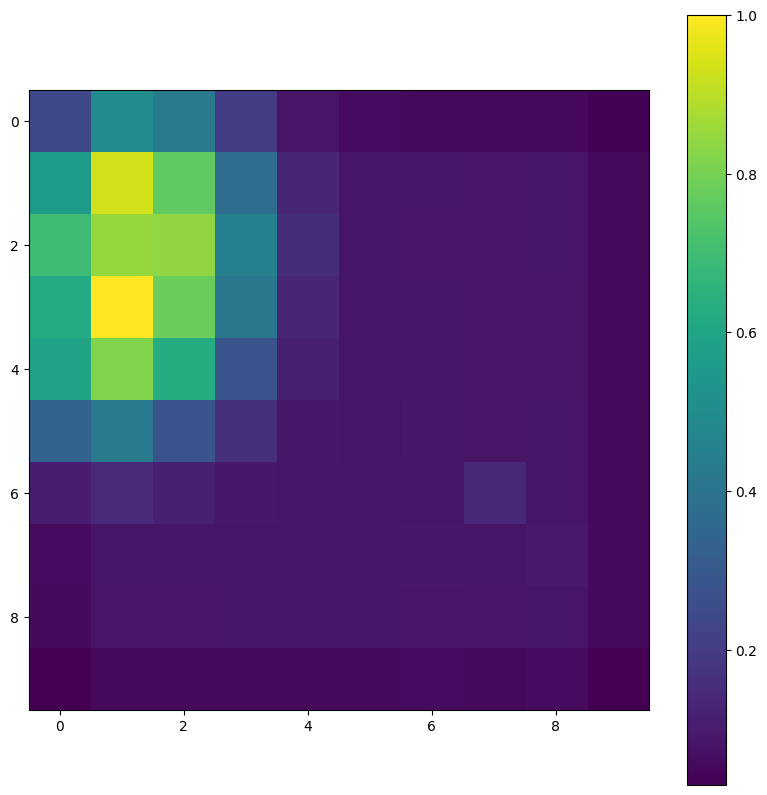

In [12]:
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X.values, num_iteration=100)
plt.figure(figsize=(10, 10))
plt.imshow(som.distance_map(), cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.show()


In [14]:
fraud_nodes = []
for i in range(som.get_weights().shape[0]):
    for j in range(som.get_weights().shape[1]):
        if np.any(y[som.winner(X.values[i])[0]] == 1):
            fraud_nodes.append((i, j))

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def get_labels(som, X):
    labels = []
    for x in X:
        winner = som.winner(x)
        label = fraud_nodes.index((winner[0], winner[1])) if (winner[0], winner[1]) in fraud_nodes else -1
        labels.append(label)
    return labels

y_pred = np.array([1 if label != -1 else 0 for label in get_labels(som, X.values)])
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9982725143693799
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-19-00bf74fd5d45>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_count.index, y=fraud_count.values, palette='coolwarm')


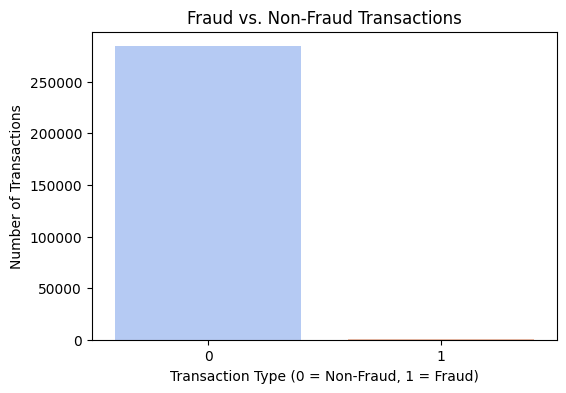

In [19]:
import seaborn as sns
fraud_count = data['Class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette='coolwarm')
plt.title('Fraud vs. Non-Fraud Transactions')
plt.xlabel('Transaction Type (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

